<a href="https://colab.research.google.com/github/sagunkayastha/CAI_Workshop/blob/main/CAI_Workshop/Workshop_s3/VGG_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

def preprocess(image, label, if_softmax=False):
    resized_image = tf.image.resize(image, [224, 224]) / 255.0
    return resized_image, tf.cast(label, tf.float32)


# Loading the dataset
(raw_train, raw_validation), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
)

batch_size = 32
train_dataset = raw_train.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)
validation_dataset = raw_validation.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)


# Plot examples

In [ ]:
import matplotlib.pyplot as plt

# Take a batch of images and labels from the training dataset
for images, labels in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(int(labels[i].numpy()))
        plt.axis("off")
plt.show()

# Original VGG Network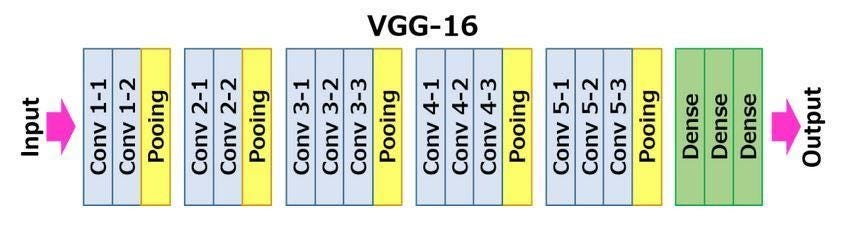

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # Block 1
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 2
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 3
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 4
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # Block 5
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # For binary classification ### USING SIGMOID, not SOFTmas
])


In [ ]:


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=10)

# Smaller custom VGG with sigmoid


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    # block 1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    # block 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    # block 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.summary()


In [ ]:
# Compile the model
# model = VGG16(input_shape=(224, 224, 3), num_classes=1)  # Adjust num_classes if necessary

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=10)

# Smaller custom VGG with softmax

In [ ]:


def preprocess_softmax(image, label):
    image = tf.image.resize(image, [224, 224]) / 255.0
    label = tf.one_hot(tf.cast(label, tf.int32), depth=2)  # One-hot encode the labels
    return image, label

batch_size = 32
train_dataset = raw_train.map(preprocess_softmax).batch(batch_size).prefetch(tf.data.AUTOTUNE)
validation_dataset = raw_validation.map(preprocess_softmax).batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    # block 1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    # block 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    # block 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')  # Binary classification
])

model.summary()


In [ ]:
# Compile the model
# model = VGG16(input_shape=(224, 224, 3), num_classes=1)  # Adjust num_classes if necessary

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=10)